In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy

plt.rcParams['axes.formatter.useoffset'] = False

In [2]:
# Open the data and get a subset
hdulist = fits.open('/grp/hst/hstlc/hst13902/outputs/composite/V-KL-UMA_FUV_G160M_1600_curve.fits', mode='readonly')
subset = np.where(56853 < hdulist[1].data['mjd'])
all_counts = hdulist[1].data['net'] # use flux for longer timescales, otherwise use net
all_times = hdulist[1].data['mjd']
counts, times = [], []
for count, time in zip(all_counts, all_times):
    if 56853.930 < time < 56853.955:
        counts.append(count)
        times.append(time)

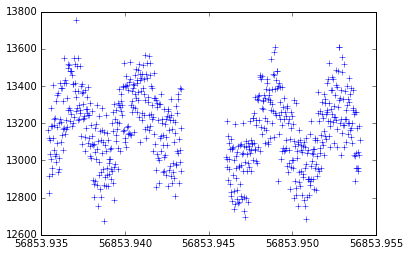

In [3]:
# Plot the sample
fig, ax = plt.subplots()
ax.plot(times, counts, 'b+')

**It appears that this object has a period of ~0.004 days, or ~6 minutes**

We should restrict ourselves to finding periods between the sampling time and the length of a few orbits (~96 mintues per orbit).  We will use thre|e different domains:
1. short-term variability (sampling time to ~10 minutes)
2. medium-term variability (~10 minutes to ~1 hour)
3. long-term variability (~1 hour to ~10 hours)

In [4]:
short_freq = (hdulist[0].header['STEPSIZE'] / (60. * 60. * 24.))
med_freq = (10. / (60. * 24.))
long_freq = 1. / 24.
max_freq = 10. / 24.

## Lomb-Scargle Periodogram via scipy

In [5]:
from scipy.signal import lombscargle

In [6]:
short_periods = np.linspace(short_freq, med_freq, len(times))
med_periods = np.linspace(med_freq, long_freq, len(times))
long_periods = np.linspace(long_freq, max_freq, len(times))

In [7]:
short_ang_freqs = 2 * np.pi / short_periods
med_ang_freqs = 2 * np.pi / med_periods
long_ang_freqs = 2 * np.pi / long_periods

In [8]:
short_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), short_ang_freqs)
med_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), med_ang_freqs)
long_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), long_ang_freqs)
short_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)
med_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)
long_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)

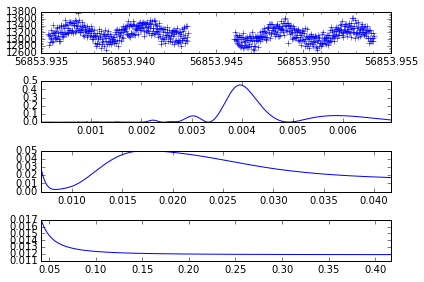

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')
ax2.plot(short_periods, short_power)
ax3.plot(med_periods, med_power)
ax4.plot(long_periods, long_power)
ax2.set(xlim=(short_freq, med_freq))
ax3.set(xlim=(med_freq, long_freq))
ax4.set(xlim=(long_freq, max_freq))
fig.tight_layout()

## Lomb-Scargle Periodogram via astroML

In [10]:
from astroML.time_series import lomb_scargle

In [11]:
errors = [0.0001 for item in counts]

In [12]:
short_power = lomb_scargle(times, counts, errors, short_ang_freqs)
med_power = lomb_scargle(times, counts, errors, med_ang_freqs)
long_power = lomb_scargle(times, counts, errors, long_ang_freqs)

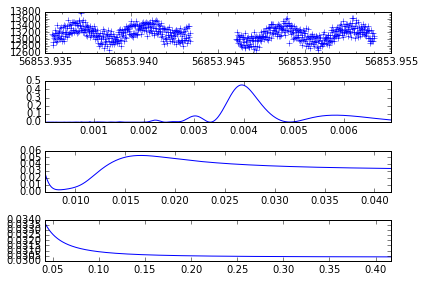

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')
ax2.plot(short_periods, short_power)
ax3.plot(med_periods, med_power)
ax4.plot(long_periods, long_power)
ax2.set(xlim=(short_freq, med_freq))
ax3.set(xlim=(med_freq, long_freq))
ax4.set(xlim=(long_freq, max_freq))
fig.tight_layout()

## Try with more data!

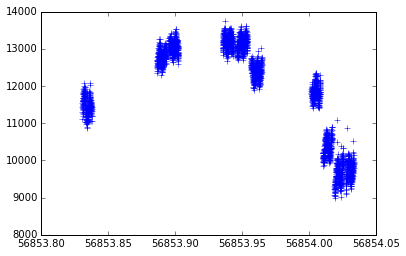

In [14]:
# Open the data and get a subset
counts, times = [], []
for count, time in zip(all_counts, all_times):
    if time > 56500:
        counts.append(count)
        times.append(time)

fig, ax = plt.subplots()
ax.plot(times, counts, 'b+')

In [15]:
short_periods = np.linspace(short_freq, med_freq, len(times))
med_periods = np.linspace(med_freq, long_freq, len(times))
long_periods = np.linspace(long_freq, max_freq, len(times))

In [16]:
short_ang_freqs = 2 * np.pi / short_periods
med_ang_freqs = 2 * np.pi / med_periods
long_ang_freqs = 2 * np.pi / long_periods

In [17]:
short_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), short_ang_freqs)
med_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), med_ang_freqs)
long_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), long_ang_freqs)
short_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)
med_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)
long_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)

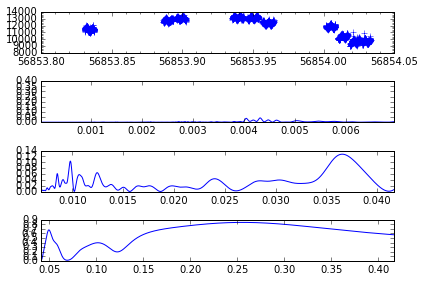

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')
ax2.plot(short_periods, short_power)
ax3.plot(med_periods, med_power)
ax4.plot(long_periods, long_power)
ax2.set(xlim=(short_freq, med_freq))
ax3.set(xlim=(med_freq, long_freq))
ax4.set(xlim=(long_freq, max_freq))
fig.tight_layout()

## Try with noisy data

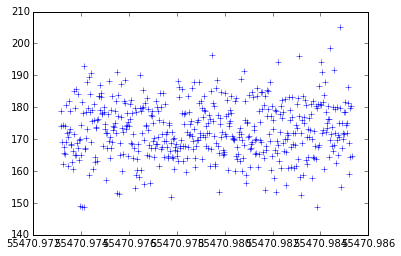

In [19]:
# Open the data and get a subset
hdulist = fits.open('/grp/hst/hstlc/hst13902/outputs/composite/SDSSJ155304.92+354828.6_FUV_G130M_1309_curve.fits', mode='readonly')
subset = np.where(56853 < hdulist[1].data['mjd'])
counts = hdulist[1].data['net'] # use flux for longer timescales, otherwise use net
times = hdulist[1].data['mjd']

counts = counts.byteswap().newbyteorder()
times = times.byteswap().newbyteorder()

# Plot the sample
fig, ax = plt.subplots()
ax.plot(times, counts, 'b+')

In [20]:
short_periods = np.linspace(short_freq, med_freq, len(times))
med_periods = np.linspace(med_freq, long_freq, len(times))
long_periods = np.linspace(long_freq, max_freq, len(times))

In [21]:
short_ang_freqs = 2 * np.pi / short_periods
med_ang_freqs = 2 * np.pi / med_periods
long_ang_freqs = 2 * np.pi / long_periods

In [22]:
short_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), short_ang_freqs)
med_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), med_ang_freqs)
long_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), long_ang_freqs)
short_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)
med_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)
long_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)

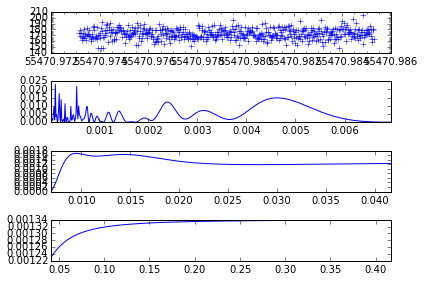

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')
ax2.plot(short_periods, short_power)
ax3.plot(med_periods, med_power)
ax4.plot(long_periods, long_power)
ax2.set(xlim=(short_freq, med_freq))
ax3.set(xlim=(med_freq, long_freq))
ax4.set(xlim=(long_freq, max_freq))
fig.tight_layout()

## Automatically detect significant periods

In [24]:
# Open the data and get a subset
hdulist = fits.open('/grp/hst/hstlc/hst13902/outputs/composite/V-KL-UMA_FUV_G160M_1600_curve.fits', mode='readonly')
subset = np.where(56853 < hdulist[1].data['mjd'])
all_counts = hdulist[1].data['net'] # use flux for longer timescales, otherwise use net
all_times = hdulist[1].data['mjd']
counts, times = [], []
for count, time in zip(all_counts, all_times):
    if 56853.930 < time < 56853.955:
        counts.append(count)
        times.append(time)

In [25]:
short_periods = np.linspace(short_freq, med_freq, len(times))
med_periods = np.linspace(med_freq, long_freq, len(times))
long_periods = np.linspace(long_freq, max_freq, len(times))

In [26]:
short_ang_freqs = 2 * np.pi / short_periods
med_ang_freqs = 2 * np.pi / med_periods
long_ang_freqs = 2 * np.pi / long_periods

In [27]:
short_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), short_ang_freqs)
med_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), med_ang_freqs)
long_power = lombscargle(np.asarray(times), np.asarray(counts) - np.asarray(counts).mean(), long_ang_freqs)
short_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)
med_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)
long_power *= 2 / (len(times) * np.asarray(counts).std() ** 2)

In [28]:
short_mean = np.mean(short_power)
med_mean = np.mean(med_power)
long_mean = np.mean(long_power)

In [29]:
short_std = np.std(short_power)
med_std = np.std(med_power)
long_std = np.std(long_power)

In [30]:
short_three_sigma = 3 * short_std
med_three_sigma = 3 * med_std
long_three_sigma = 3 * long_std

In [31]:
short_power_three_sigma = np.where(short_power > short_three_sigma)
med_power_three_sigma = np.where(med_power > med_three_sigma)
long_power_three_sigma = np.where(long_power > long_three_sigma)
short_period_three_sigma = np.where(short_power > short_three_sigma)
med_period_three_sigma = np.where(med_power > med_three_sigma)
long_period_three_sigma = np.where(long_power > long_three_sigma)

In [32]:
short_starting_index = short_power_three_sigma[0][0]
med_starting_index = med_power_three_sigma[0][0]
long_starting_index = long_power_three_sigma[0][0]

In [33]:
short_significant_periods = scipy.signal.argrelextrema(short_power[short_power_three_sigma], np.greater)
med_significant_periods = scipy.signal.argrelextrema(med_power[med_power_three_sigma], np.greater)
long_significant_periods = scipy.signal.argrelextrema(long_power[long_power_three_sigma], np.greater)

In [34]:
short_significant_periods_three_sigma = short_periods[[period + short_starting_index for period in short_significant_periods]]
med_significant_periods_three_sigma = med_periods[[period + med_starting_index for period in med_significant_periods]]
long_significant_periods_three_sigma = long_periods[[period + long_starting_index for period in long_significant_periods]]

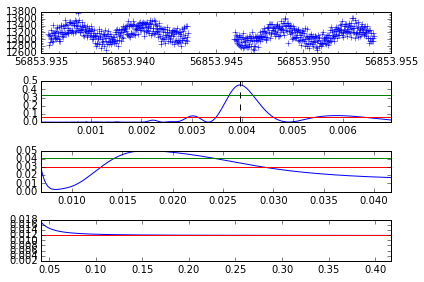

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
ax1.minorticks_on()
ax1.plot(times, counts, 'b+')

ax2.plot(short_periods, short_power)
ax2.axhline(short_mean, color='r', linestyle='-')
ax2.axhline(short_three_sigma, color='g', linestyle='-')
for period in short_significant_periods_three_sigma:
    ax2.axvline(period, color='k', linestyle='--')
ax2.set(xlim=(short_freq, med_freq))

ax3.plot(med_periods, med_power)
ax3.axhline(med_mean, color='r', linestyle='-')
ax3.axhline(med_three_sigma, color='g', linestyle='-')
for period in med_significant_periods_three_sigma:
    ax2.axvline(period, color='k', linestyle='--')
ax3.set(xlim=(med_freq, long_freq))

ax4.plot(long_periods, long_power)
ax4.axhline(long_mean, color='r', linestyle='-')
ax4.axhline(long_three_sigma, color='g', linestyle='-')
for period in long_significant_periods_three_sigma:
    ax2.axvline(period, color='k', linestyle='--')
ax4.set(xlim=(long_freq, max_freq))

fig.tight_layout()